## Análisis de Información Recopilada - Clase Espejo Logro Académico

### Paso 1: Cargue de librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

### Cargue de la data

In [2]:
datos = pd.read_csv('./datosFinalesL.csv', sep=';', encoding='latin1')
datos.head()
datos.shape

(103, 26)

### Paso 2: Pre procesamiento de la data

In [3]:
##Renombrar las columnas
datos.columns = ['DemoEstrato','DemoEdad','DemoGenero','DemoSemestre','DemoPadres','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo','Pedag1','Pedag2','Pedag3','Pedag4','Pedag5','Pedag6','Pedag7','Pedag8','Pedag9','Pedag10','Pedag11','Pedag12','Pedag13','Pedag14','Pedag15','Pedag16','LogroAca']
datos.head()

data = datos.drop(['LogroAca'],axis=1)

In [4]:
##Demográficos
round(datos.DemoEstrato.value_counts()/np.float64(len(datos)),2)*100

##El 63% de la población es de estrato 2, 21% estrato 1 y el restante 16% estrato 3,4 y 5

2    63.0
1    21.0
3    10.0
4     4.0
5     2.0
Name: DemoEstrato, dtype: float64

In [5]:
round(datos.DemoEdad.value_counts()/np.float64(len(datos)),2)*100
#El 63% de la población se encuentran en el rango de edad 21 a 25 años
#El 21% entre 17 -20 años y el restante 16% son mayores de 25 años.

2    63.0
1    21.0
3    16.0
Name: DemoEdad, dtype: float64

In [6]:
round(datos.DemoGenero.value_counts()/np.float64(len(datos)),2)*100
#El 65% de los encuestados son hombres y el 35% son mujeres

1    65.0
2    35.0
Name: DemoGenero, dtype: float64

In [7]:
round(datos.DemoSemestre.value_counts()/np.float64(len(datos)),2)*100
#El 45% de las personas encuestadas pertenecen a decimo semestre, el 21% al noveno semestre, el 18% a septimo semestre y el 16% final a quinto semestre.

10    45.0
9     21.0
7     18.0
5     16.0
Name: DemoSemestre, dtype: float64

In [8]:
pd.crosstab(datos.DemoGenero, datos.DemoPadres, margins=True, margins_name="Total")
  #37 estudiantes del género masculino no viven con sus padres actualmente, 30 estudiantes del género masculino si conviven con sus padres
  #En el caso de las mujeres la relación es 17 no viven con sus padres y 19 si lo hacen actualmente.

DemoPadres,0,1,Total
DemoGenero,,,
1,37,30,67
2,17,19,36
Total,54,49,103


In [9]:
pd.crosstab(datos.DemoEstrato, datos.DemoPadres, margins=True, margins_name="Total")
#54 estudiantes de estratos 1 y 2 es donde se encuentran el mayor número que no vive con los padres.

DemoPadres,0,1,Total
DemoEstrato,,,
1,14,8,22
2,34,31,65
3,5,5,10
4,1,3,4
5,0,2,2
Total,54,49,103


In [10]:
pd.crosstab(datos.DemoEstrato, datos.DemoLaborando, margins=True, margins_name="Total")
#68 personas de los estratos 1,2,3,4 y5 no se encuentran laborando actualmente. 
# Los estratos 1 y 2 son los que mayor cantidad poblacional tienen en esa situacion

DemoLaborando,0,1,Total
DemoEstrato,,,
1,15,7,22
2,40,25,65
3,9,1,10
4,3,1,4
5,1,1,2
Total,68,35,103


In [11]:
pd.crosstab(datos.DemoGenero, datos.DemoEsMental, margins=True, margins_name="Total")
#41 hombres aducen que su trabajo no implica esfuerzo mental de igual manera 27 mujeres confirman la misma tendencia.

DemoEsMental,0,2,3,4,5,Total
DemoGenero,,,,,,
1,41,1,9,8,8,67
2,27,1,6,2,0,36
Total,68,2,15,10,8,103


### Paso 3: Gráficas mas Relevantes

In [12]:
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
def drawChart(dim, column1, column2, texto1, texto2, explod, preguntaC, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=18, weight='bold')
    
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(column1, hue=column2, data=datos, ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    
    plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 

def drawChart2(dim, column1, column2, texto2, question, sizes):
  f, ax = plt.subplots(figsize=(sizes[0],sizes[1]))
  f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, question), x= 0.5, y =1.05, fontsize=18, weight='bold')

  plot = sns.countplot(column2, hue=column1, data=datos, palette=colors)
  for i in plot.patches:
      plot.annotate(i.get_height(),
                    (i.get_x() + i.get_width()/2, i.get_height()),
                    ha='center', va='baseline', fontsize=12, 
                    color='black', xytext=(0,1),
                    textcoords='offset points')
  ax.set_title(texto2,fontsize=14)
  ax.set_xlabel('', fontsize=12)
  ax.set_ylabel('', fontsize=12)
  ax.tick_params(labelsize=14)
  
  plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'],fontsize=10)
  plt.show() 


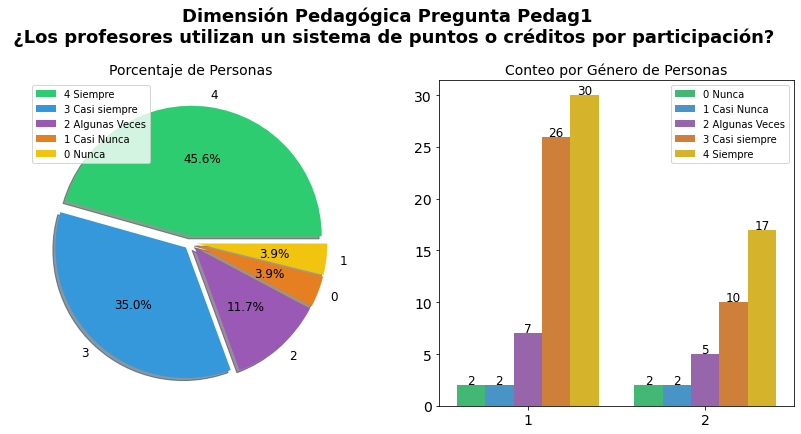

In [13]:
drawChart('Pedagógica','DemoGenero','Pedag1', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05, 0.05, 0.05,0.05), 
          '¿Los profesores utilizan un sistema de puntos o créditos por participación?', sizes=[14,6])
#0 Nunca 
#1 Casi nunca 
#2 Algunas veces  
#3 Casi siempre 
#4 Siempre 
#el 45,6% de los encuestados aducen que los docentes si utilizan un sistema de puntos o créditos por participación en la clase espejo.
#Un 8% aduce que nunca se utiliza dicho sistema.

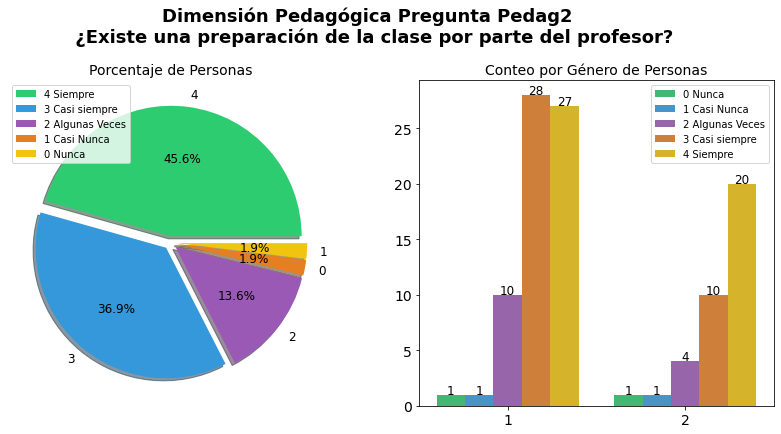

In [14]:
drawChart('Pedagógica','DemoGenero','Pedag2', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Existe una preparación de la clase por parte del profesor?', sizes=[14,6])
          #el 45,6% de los encuestados aducen que los docentes casi siempre preparan la clase espejo a impartir. Un 4% reconoce que no existe preparación 
          #para dicho encuentro.

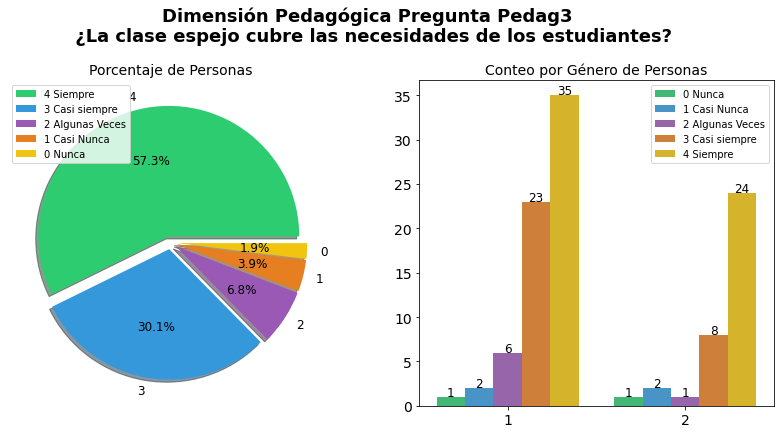

In [15]:
drawChart('Pedagógica','DemoGenero','Pedag3', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La clase espejo cubre las necesidades de los estudiantes?', sizes=[14,6])
          #El 57.3% de las personas aducen que casi siempre se cubre con las necesidades de los estudiantes en la clase espejo.

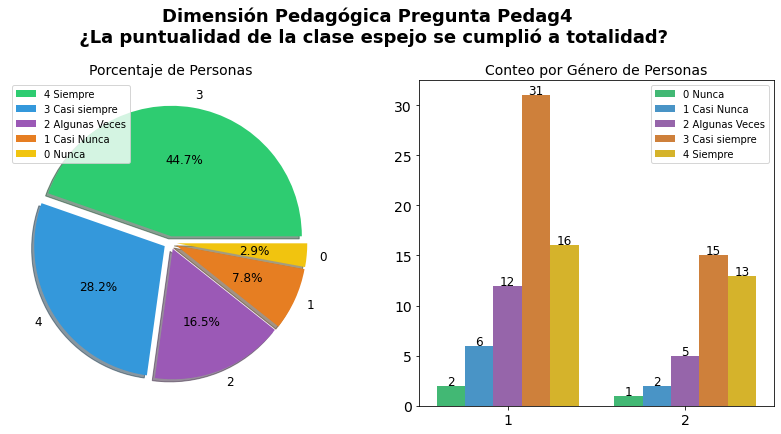

In [16]:
drawChart('Pedagógica','DemoGenero','Pedag4', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La puntualidad de la clase espejo se cumplió a totalidad?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que casi siempre se cumple con el horario de la clase espejo. Un 11% aduce que no se cumple con los horarios
#pactados

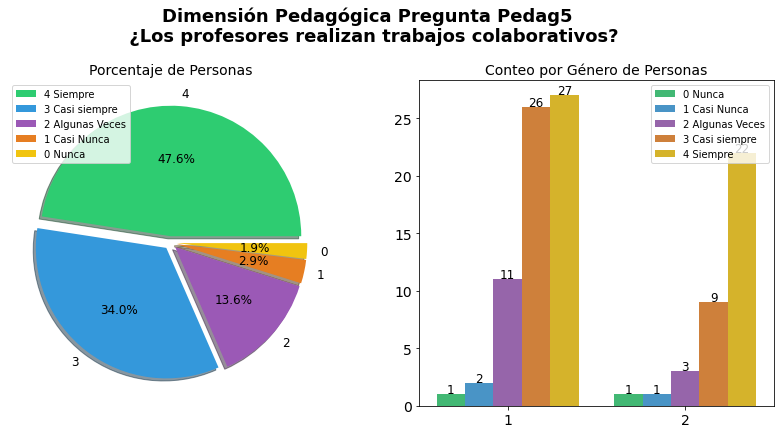

In [17]:
drawChart('Pedagógica','DemoGenero','Pedag5', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores realizan trabajos colaborativos?', sizes=[14,6])
#Algunas veces los profesores realizan trabajos colaborativos durante la clase espejo con un 13,6% de los estudiantes lo afirman

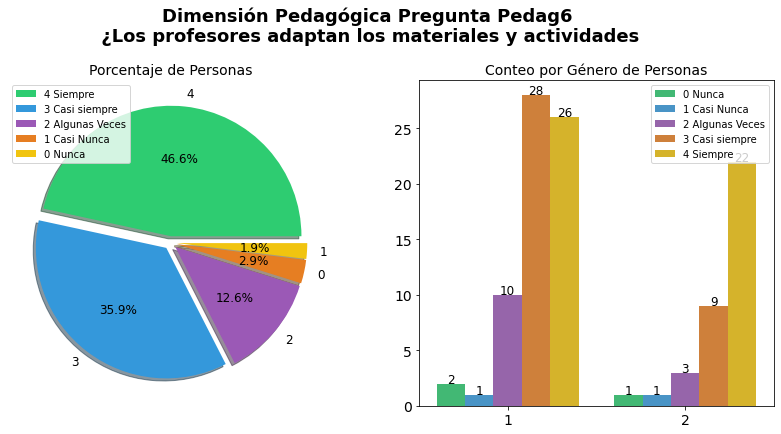

In [18]:
drawChart('Pedagógica','DemoGenero','Pedag6', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores adaptan los materiales y actividades ', sizes=[14,6])
# 

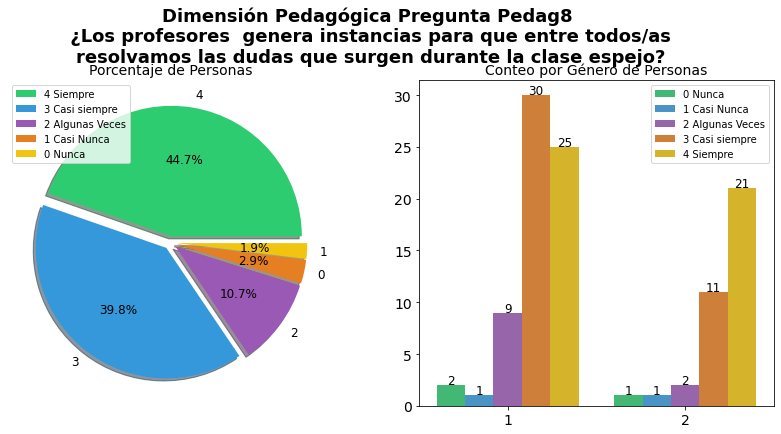

In [19]:
drawChart('Pedagógica','DemoGenero','Pedag8', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  genera instancias para que entre todos/as \nresolvamos las dudas que surgen durante la clase espejo?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que siempre los profesores generan espacios para aclarar dudas.

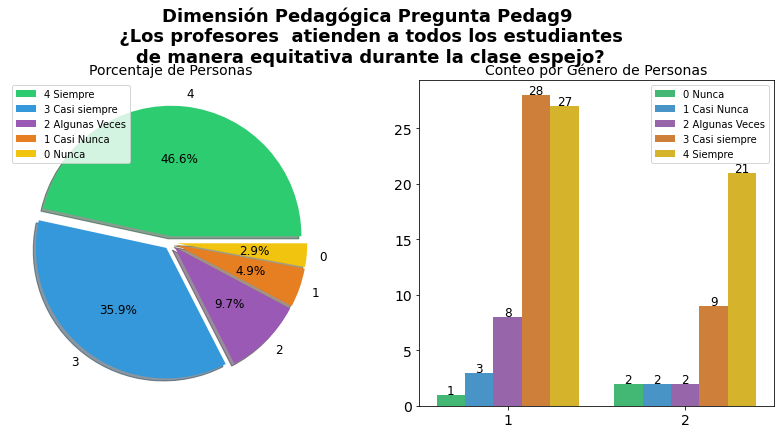

In [20]:
drawChart('Pedagógica','DemoGenero','Pedag9', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  atienden a todos los estudiantes \nde manera equitativa durante la clase espejo?', sizes=[14,6])
          #9,7% de los estudiantes evidencian que no son atendidas sus dudas en las clases espejo.

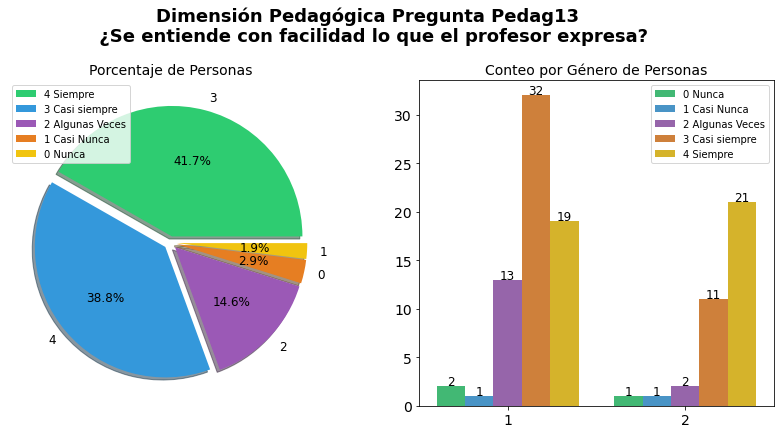

In [21]:
drawChart('Pedagógica','DemoGenero','Pedag13', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Se entiende con facilidad lo que el profesor expresa?', sizes=[14,6])
    #41,7% aducen que casi siempre se entiende lo que el profesor expresa.un 18% reconoce que no se entiende lo explicado por el docente.

In [22]:
datos['LogroAca'].value_counts()

Se cumple Aceptable     70
Se cumple Alto Grado    26
Se cumple Bajo Grado     7
Name: LogroAca, dtype: int64

### Paso 4: Normalización, Test de Normalidad, Correlación de Pearson y Alpha de Cronbach

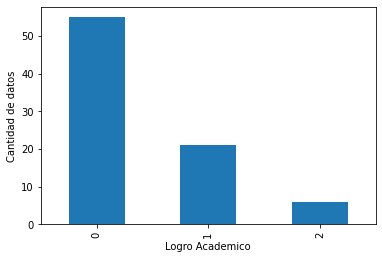

In [23]:

#!pip install scikit-plot
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datos['LogroAca']= label_encoder.fit_transform(datos['LogroAca']) 

## Balance de carga de variables
features = []
for feature in datos.columns:
    if feature != 'LogroAca':
        features.append(feature)
X = datos[features]
y = datos['LogroAca']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Academico')
plt.show()

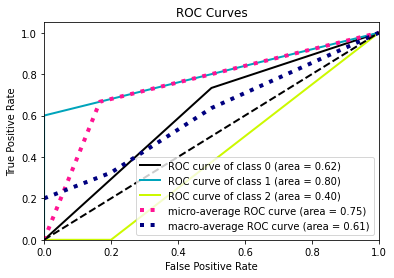

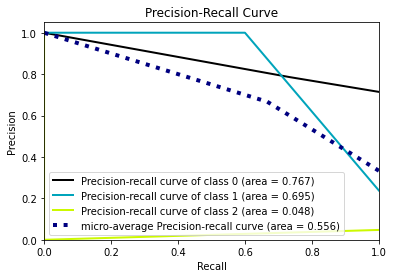

In [24]:
#!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [25]:
#pip install -U imbalanced-learn

In [26]:
#!pip install -U imbalanced-learn
import numpy as np
n_samples = count.median().astype(np.int64)

def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

from imblearn.under_sampling import ClusterCentroids
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

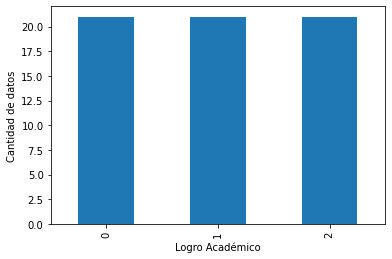

In [27]:
count = y_bal.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

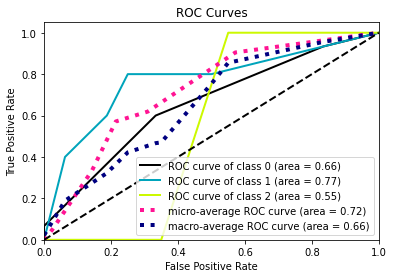

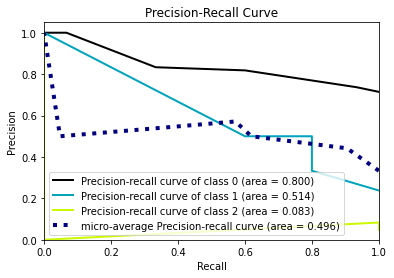

In [28]:
model = KNeighborsClassifier()
model.fit(X_bal, y_bal)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [29]:
from sklearn.utils import class_weight
clases = np.unique(y_train)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_train)
weights = dict(zip(clases,cw))

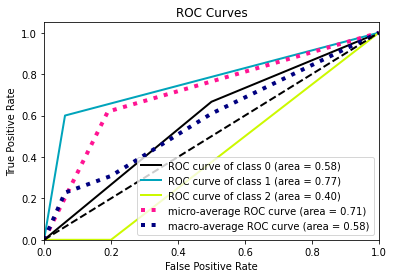

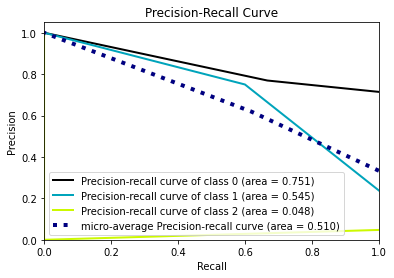

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [31]:
datosVie = data
dataLista = X_bal

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
df_normalizados = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [32]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(df_normalizados)

df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,3.556156e-08,No es una variable Normal
1,DemoEdad,2.499941e-09,No es una variable Normal
2,DemoGenero,3.364378e-12,No es una variable Normal
3,DemoSemestre,3.719715e-08,No es una variable Normal
4,DemoPadres,1.128216e-11,No es una variable Normal
...,...,...,...
20,Pedag12,1.745672e-06,No es una variable Normal
21,Pedag13,1.183416e-07,No es una variable Normal
22,Pedag14,3.334360e-06,No es una variable Normal
23,Pedag15,8.324534e-07,No es una variable Normal


In [33]:
df_normalizados['LogroAca'] = y_bal

In [34]:

corr_matrix = df_normalizados.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
214,DemoTrabajo,DemoEsMental,0.951799,0.951799
164,DemoEsMental,DemoTrabajo,0.951799,0.951799
188,DemoEsFisico,DemoEsMental,0.928247,0.928247
163,DemoEsMental,DemoEsFisico,0.928247,0.928247
136,DemoLaborando,DemoEsMental,0.924045,0.924045
...,...,...,...,...
515,Pedag11,Pedag13,0.889276,0.889276
622,Pedag15,Pedag16,0.885534,0.885534
647,Pedag16,Pedag15,0.885534,0.885534
359,Pedag5,Pedag13,0.882910,0.882910


Text(0.5, 1.0, 'Mapa de Correlación')

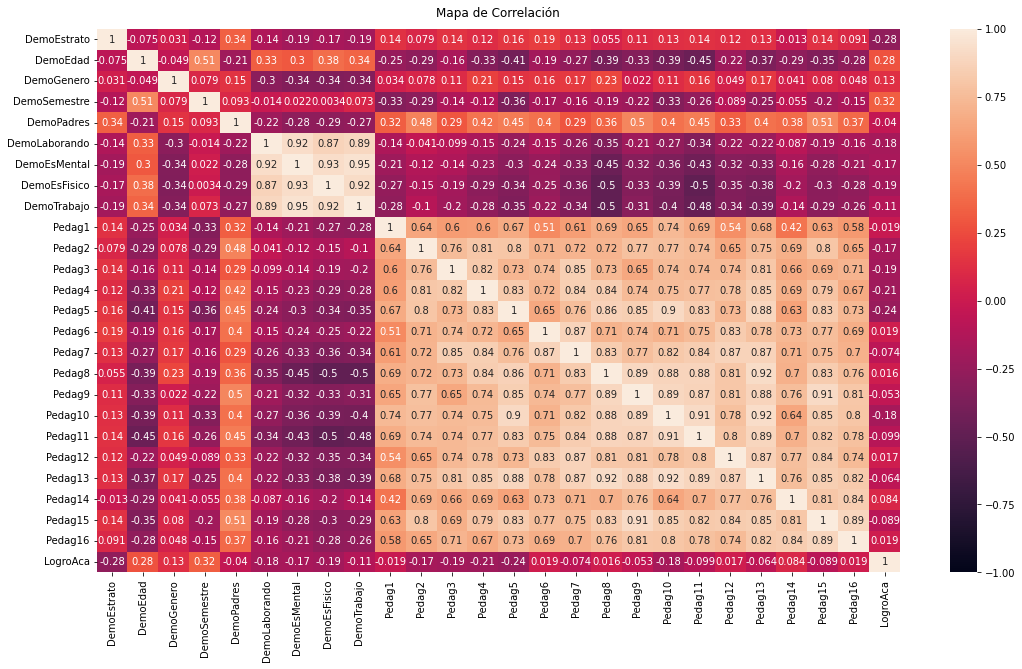

In [35]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [36]:
#!pip install pingouin
import pingouin as pg

pg.cronbach_alpha(data=df_normalizados)

datosOrg = df_normalizados[list(df_normalizados.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.91

(0.8222685764670338, array([0.752, 0.88 ]))

### Paso 5: Modelos Clasificacion

In [37]:
valores = X_test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=X_test.columns)

normalizados = scaler.transform(valores)
X_test_norm = pd.DataFrame(normalizados,
                              index=X_test.index,
                              columns=X_test.columns)
X_test_norm

,DemoEstrato,DemoEdad,DemoGenero,DemoSemestre,DemoPadres,DemoLaborando,DemoEsMental,DemoEsFisico,DemoTrabajo,Pedag1,...,Pedag7,Pedag8,Pedag9,Pedag10,Pedag11,Pedag12,Pedag13,Pedag14,Pedag15,Pedag16
21,0.25,0.5,0.0,1.0,1.0,1.0,1.0,0.6,0.4,1.00,...,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
57,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,...,0.666667,1.000000,0.75,0.666667,1.000000,0.666667,0.666667,1.0,1.0,0.5
89,0.25,0.5,1.0,0.8,1.0,1.0,0.6,0.6,0.8,1.00,...,1.000000,1.000000,1.00,1.000000,0.666667,1.000000,1.000000,1.0,1.0,1.0
95,0.25,0.0,1.0,0.8,1.0,0.0,0.0,0.0,0.0,0.50,...,0.333333,0.666667,0.50,0.333333,0.666667,0.333333,0.666667,0.0,0.5,0.0
36,0.00,0.5,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.50,...,0.333333,0.333333,0.50,0.333333,0.333333,0.666667,0.333333,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.25,0.5,0.0,0.4,0.0,0.0,0.0,0.0,0.0,1.00,...,0.333333,0.666667,0.25,0.000000,0.666667,0.000000,0.666667,0.5,0.5,0.5
74,0.00,0.0,1.0,0.8,1.0,0.0,0.0,0.0,0.0,1.00,...,0.666667,0.666667,0.75,0.666667,0.666667,0.666667,0.666667,0.5,0.5,0.5
5,0.25,0.5,0.0,1.0,1.0,1.0,0.6,0.2,0.8,1.00,...,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.0
68,0.25,0.5,0.0,1.0,0.0,1.0,0.6,1.0,1.0,1.00,...,1.000000,0.666667,0.75,0.666667,0.666667,0.666667,0.666667,0.5,0.5,0.5


In [38]:
df_normalizados.drop(['LogroAca'], axis=1, inplace= True)

In [39]:
df_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DemoEstrato    63 non-null     float64
 1   DemoEdad       63 non-null     float64
 2   DemoGenero     63 non-null     float64
 3   DemoSemestre   63 non-null     float64
 4   DemoPadres     63 non-null     float64
 5   DemoLaborando  63 non-null     float64
 6   DemoEsMental   63 non-null     float64
 7   DemoEsFisico   63 non-null     float64
 8   DemoTrabajo    63 non-null     float64
 9   Pedag1         63 non-null     float64
 10  Pedag2         63 non-null     float64
 11  Pedag3         63 non-null     float64
 12  Pedag4         63 non-null     float64
 13  Pedag5         63 non-null     float64
 14  Pedag6         63 non-null     float64
 15  Pedag7         63 non-null     float64
 16  Pedag8         63 non-null     float64
 17  Pedag9         63 non-null     float64
 18  Pedag10     

In [40]:
X_train = df_normalizados
y_train = y_bal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

y_pred = lda.predict(X_test_norm)
print(accuracy_score(y_test,y_pred))






0.47619047619047616


In [41]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))
#https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.50      0.60      0.55         5
           2       0.11      1.00      0.20         1

    accuracy                           0.48        21
   macro avg       0.54      0.67      0.44        21
weighted avg       0.84      0.48      0.55        21



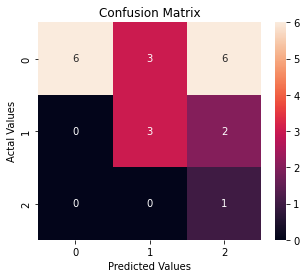

In [42]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()           

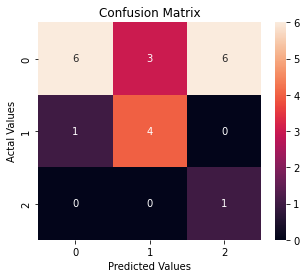

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

y_pred = clf.predict(X_test_norm)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()       

In [44]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.57      0.80      0.67         5
           2       0.14      1.00      0.25         1

    accuracy                           0.52        21
   macro avg       0.52      0.73      0.49        21
weighted avg       0.76      0.52      0.56        21



### Regresión Logistica Multiclase

In [45]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

##Predicciones

modelfit = model.fit(X_train, y_train)

model.score(X_train, y_train)


y_pred =model.predict(X_test_norm)

##Matriz de confusion
print(classification_report(y_test, y_pred))


Mean Accuracy: 0.787 (0.174)
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.57      0.80      0.67         5
           2       0.20      1.00      0.33         1

    accuracy                           0.62        21
   macro avg       0.55      0.78      0.56        21
weighted avg       0.78      0.62      0.65        21



>0.0000 0.819 (0.147)
>0.0001 0.551 (0.175)
>0.0010 0.551 (0.175)
>0.0100 0.631 (0.167)
>0.1000 0.722 (0.140)
>1.0000 0.787 (0.174)


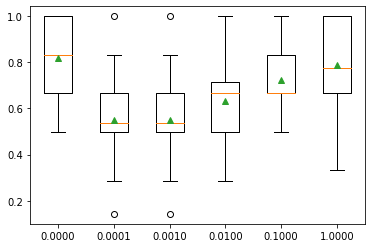

In [46]:

# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get the dataset
def get_dataset():
	X, y = X_train, y_train
	return X, y


def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Nuevos Modelos

In [47]:
df_normalizados.drop(['DemoEstrato','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo'], axis=1, inplace=True)
df_normalizados.drop(['Pedag4','Pedag7','Pedag10','Pedag11'], axis=1, inplace=True)

df_normalizados.drop(['Pedag2','Pedag3'], axis=1, inplace=True)

df_normalizados['LogroAca'] = y_bal

X_test_norm.drop(['DemoEstrato','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo'], axis=1, inplace=True)

X_test_norm.drop(['Pedag4','Pedag7','Pedag10','Pedag11'], axis=1, inplace=True)

X_test_norm.drop(['Pedag2','Pedag3'], axis=1, inplace=True)

corr_matrix = df_normalizados.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
157,Pedag13,Pedag8,0.917297,0.917297
115,Pedag8,Pedag13,0.917297,0.917297
188,Pedag15,Pedag9,0.911526,0.911526
132,Pedag9,Pedag15,0.911526,0.911526
113,Pedag8,Pedag9,0.891311,0.891311
...,...,...,...,...
117,Pedag8,Pedag15,0.833765,0.833765
87,Pedag5,Pedag15,0.831759,0.831759
185,Pedag15,Pedag5,0.831759,0.831759
141,Pedag12,Pedag6,0.830497,0.830497


Text(0.5, 1.0, 'Mapa de Correlación')

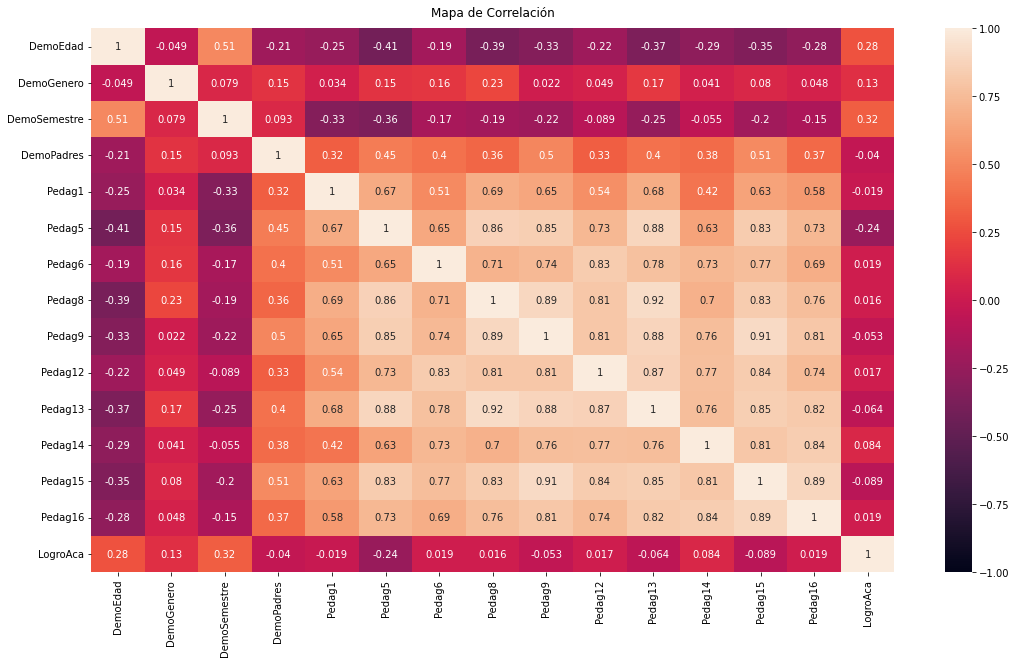

In [48]:
##Correlacion nueva
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [49]:
df_normalizados.drop(['LogroAca'], axis=1, inplace= True)

In [59]:
df_normalizados.head()

,DemoEdad,DemoGenero,DemoSemestre,DemoPadres,Pedag1,Pedag5,Pedag6,Pedag8,Pedag9,Pedag12,Pedag13,Pedag14,Pedag15,Pedag16
0,1.0,0.0,0.8,0.0,0.75,1.00,0.75,0.75,1.00,0.75,0.75,0.75,0.75,0.75
1,0.0,0.0,1.0,0.0,0.75,0.50,0.50,0.75,0.50,0.50,0.50,0.75,0.50,0.50
2,0.5,0.0,0.8,0.0,0.75,0.75,0.75,1.00,1.00,0.75,0.75,0.75,0.75,0.75
3,0.5,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.5,0.0,0.8,0.0,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75


In [50]:
X_train = df_normalizados
y_train = y_bal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

y_pred = lda_model.predict(X_test_norm)
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

0.5714285714285714
              precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.50      0.80      0.62         5
           2       0.20      1.00      0.33         1

    accuracy                           0.57        21
   macro avg       0.53      0.76      0.52        21
weighted avg       0.75      0.57      0.60        21



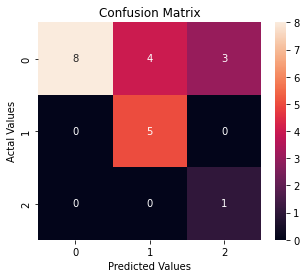

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc_model = SVC(kernel = 'linear').fit(X_train,y_train)
svc_model.predict(X_train)

y_pred = svc_model.predict(X_test_norm)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show() 

In [52]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.56      1.00      0.71         5
           2       0.25      1.00      0.40         1

    accuracy                           0.67        21
   macro avg       0.60      0.84      0.60        21
weighted avg       0.86      0.67      0.69        21



In [53]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

##Predicciones

modelfit = log_model.fit(X_train, y_train)

log_model.score(X_train, y_train)


y_pred =log_model.predict(X_test_norm)

##Matriz de confusion
print(classification_report(y_test, y_pred))

Mean Accuracy: 0.733 (0.148)
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.50      0.80      0.62         5
           2       0.25      1.00      0.40         1

    accuracy                           0.62        21
   macro avg       0.55      0.78      0.56        21
weighted avg       0.77      0.62      0.64        21



In [54]:
##Guardar modelos
import pickle
###
#filename = 'finalized_model_SVC.sav'
#pickle.dump(svc_model, open(filename, 'wb'))

saved_model = pickle.dumps(log_model)

log_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
log_from_pickle.predict(X_test_norm)

print(classification_report(y_test, log_from_pickle.predict(X_test_norm)))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.50      0.80      0.62         5
           2       0.25      1.00      0.40         1

    accuracy                           0.62        21
   macro avg       0.55      0.78      0.56        21
weighted avg       0.77      0.62      0.64        21



In [55]:
res = log_from_pickle.predict(X_test_norm)

In [56]:
res

array([1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0])

In [57]:
import collections
import numpy as np
unique, counts = np.unique(res, return_counts=True)
diccionario = dict(zip(unique, counts))

clasecero = diccionario[0]
claseuno = diccionario[1]
clasedos = diccionario[2]

if clasecero > claseuno & clasecero > clasedos:
  print('Pertenece a la clase cero')
elif claseuno > clasecero & claseuno > clasedos:
  print('Pertenece a la clase uno')
else:
  print('Pertenece a la clase dos')

Pertenece a la clase cero


In [61]:
X_train

,DemoEdad,DemoGenero,DemoSemestre,DemoPadres,Pedag1,Pedag5,Pedag6,Pedag8,Pedag9,Pedag12,Pedag13,Pedag14,Pedag15,Pedag16
0,1.0,0.0,0.8,0.0,0.75,1.00,0.75,0.75,1.00,0.75,0.75,0.75,0.75,0.75
1,0.0,0.0,1.0,0.0,0.75,0.50,0.50,0.75,0.50,0.50,0.50,0.75,0.50,0.50
2,0.5,0.0,0.8,0.0,0.75,0.75,0.75,1.00,1.00,0.75,0.75,0.75,0.75,0.75
3,0.5,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.5,0.0,0.8,0.0,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.5,0.0,0.8,0.0,0.25,0.00,0.50,0.00,0.25,0.25,0.00,0.50,0.25,0.25
59,0.5,1.0,0.8,0.0,0.75,0.75,0.75,1.00,0.75,0.75,0.75,0.75,0.75,0.75
60,1.0,0.0,1.0,0.0,0.50,0.25,0.50,0.25,0.25,0.25,0.25,0.50,0.25,0.50
61,0.5,0.0,0.8,0.0,0.75,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75
